# Some optimization ideas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Linear Regression

first let us generate some simple data using the following model.

for $i = \{1, 2, \cdots, m\}$, let $y^{(i)} = \theta_0 + \x^{(i)}$ be the $n$-dimensional vectors with $n =2$

In [2]:
m, n = 100, 2
theta_true = np.random.rand(n, 1)
X = np.random.randn(m, n)

noise_var = 1e-6
noise = np.sqrt(noise_var) * np.random.randn(m, 1)

y = np.dot(X, theta_true) + noise


In [3]:
def cost_function(theta, x, y):   
    """
    Inputs: 
        theta: this is the parameter vector of size (n x 1)
        x: this is the input training sample of size (m x n)
        y: this is the output training sample of size (m x 1)
        
    Outputs: 
        cost_function(theta, x, y): the "loss" incurred under current value of parameter
    """
    yhat = np.dot(X, theta)
    return 1/m * np.linalg.norm( np.squeeze(y) - np.squeeze(yhat), 2) ** 2

def cost_gradient(theta, x, y):   
    """
    Inputs: 
        theta: this is the parameter vector of size (n x 1)
        x: this is the input training sample of size (1 x n)
        y: this is the output training sample of size (1 x 1)
        
    Outputs: 
        cost_gradient(theta, x, y): the gradient of cost evaluated at parameter theta
    """
    yhat = np.squeeze(x).dot(np.squeeze(theta))
    return 2 * (yhat  - y) * x.T

let us visualize how the "cost function" looks

[[0.64655557]
 [0.46421752]]


AttributeError: module 'matplotlib.pyplot' has no attribute 'zlabel'

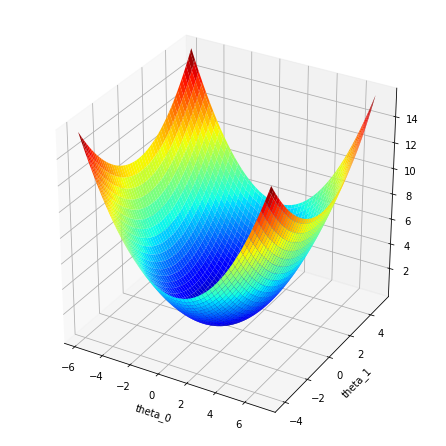

In [101]:
print(theta_true)
xx = np.linspace(-9 * theta_true[0], 11 * theta_true[0], 100)
yy = np.linspace(-9 * theta_true[1], 11 * theta_true[1], 100)

"""
xx = np.linspace(-1000, 1000, 100)
yy = np.linspace(-1000, 1000, 100)
"""
theta0, theta1 = np.meshgrid(xx, yy)
def contour_funct(theta0, theta1, x=np.array([0.5,0.5])):
    return( (x[0] * (theta_true[0] - theta0)) **2 + (x[1] * (theta_true[1] - theta1)) **2)

Z = contour_funct(theta0, theta1)


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.plot_surface(theta0, theta1, Z, cmap='jet')
plt.xlabel('theta_0')
plt.ylabel('theta_1')

plt.figure(figsize =(6,6))
plt.contourf(theta0, theta1, Z, 100, origin='image', cmap= 'jet')
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.title('Loss Contour')
plt.show()




let us implement gradient descent! 

In [68]:
def gradient_descent(X, y, theta_init, max_iter=1000, step_size = 1e-2):
    theta_list = [theta_init]
    m, n = X.shape
    for _ in range(max_iter):
        grad = 0
        for ii in range(m):
            grad += cost_gradient(theta_init, X[ii:ii+1, :], y[ii])
            
        theta_new  = theta_init - step_size * grad / m
        theta_init = theta_new
        #theta -= step_size * grad / m
        theta_list.append(theta_new) 
    return np.squeeze(np.array(theta_list))


def error_vals(X, y, theta_list):
    max_iter = theta_list.shape[0]
    err = []
    for ii in range(max_iter):
        err_tmp = cost_function(theta_list[ii], X, y)
        err.append(err_tmp)
    return err

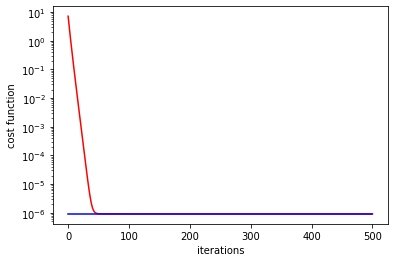

In [89]:
##initialize hyper-parameters
max_iter = 500
step_size = .1

theta_list = gradient_descent(X, y, np.random.randn(n,1), max_iter, step_size)
cost_decay = error_vals(X, y, theta_list)

plt.plot(cost_decay, 'r', range(max_iter), [cost_function(theta_true, X, y)] * max_iter, 'b')
plt.yscale("log")
plt.xlabel('iterations')
plt.ylabel('cost function')
plt.show()

what about stochastic gradient descent? 

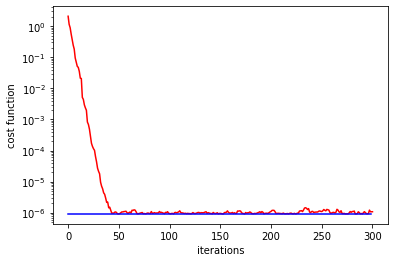

In [88]:
def stoch_gradient_descent(X, y, theta_init, batch_size=1, max_iter=1000, step_size = 1e-2):
    theta_list = [theta_init]
    m, n = X.shape
    for _ in range(max_iter):
        idx = np.random.randint(0, m, size=batch_size)
        grad=0
        for ii in idx:
            grad += cost_gradient(theta_init, X[ii:ii+1, :], y[ii])
            
        theta_new  = theta_init - step_size * grad/batch_size
        theta_init = theta_new
        #theta -= step_size * grad / m
        theta_list.append(theta_new) 
    return np.squeeze(np.array(theta_list))


##initialize hyper-parameters
max_iter1 = 300
step_size1 = .1
batch_size = 3
theta_list_sgd = stoch_gradient_descent(X, y, np.random.randn(n,1), batch_size, max_iter1, step_size1)
cost_decay_sgd = error_vals(X, y, theta_list_sgd)

plt.plot(cost_decay_sgd, 'r', range(max_iter1), [cost_function(theta_true, X, y)] * max_iter1, 'b')
plt.yscale("log")
plt.xlabel('iterations')
plt.ylabel('cost function')
plt.show()